# Classification
Here we focus on three classifiers: logistic regression, linear discriminant, and quadratic discriminant. We will apply each classifier in two steps:

- When there is only one predictor.
- When there are two or more predictors.









# Load file
Load credit data set. 
for excel files pandas library is used
- pandas function `pd.read_csv`


In [2]:
import pandas as pd
path='data/'
filename = path+'Default.xlsx'
default_data = pd.read_excel(filename)

In [3]:
default_data.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


#  Factorize
Machine learning algorithms cannot function with string variables. We need to transform 'Yes' and 'No' to some numerical values. For binary variables it is convenient to transform the categories to zero and one. Let's transform 'No' to zero and 'Yes' to one before going further.

In [4]:
default_data['default_factor'] = default_data.default.factorize()[0]
default_data.head()

,default,student,balance,income,default_factor
1,No,No,729.526495,44361.625074,0
2,No,Yes,817.180407,12106.134700,0
3,No,No,1073.549164,31767.138947,0
4,No,No,529.250605,35704.493935,0
5,No,No,785.655883,38463.495879,0


# Simple logistic regression
Here we predict the default status 'No'=0 or 'Yes' only based on credit balance.

In [5]:
# Make sure you feed the data in the right shape  
from sklearn.linear_model import LogisticRegression

X = default_data[['balance']]
y = default_data['default_factor']

lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
lr.intercept_

array([-9.46506555])

In [7]:
lr.coef_

array([[ 0.00478248]])

In [8]:
import numpy as np

X_pred = np.array([1500, 2000]).reshape(-1,1)
print(lr.predict_proba(X_pred))

[[ 0.90815806  0.09184194]
 [ 0.4750484   0.5249516 ]]


In [9]:
print(lr.predict(X_pred))

[0 1]


In [10]:
X_pred = np.linspace(start = 0, stop = 3000, num= 100).reshape(-1,1)
y_pred = lr.predict_proba(X_pred)

Text(0,0.5,'Probability')

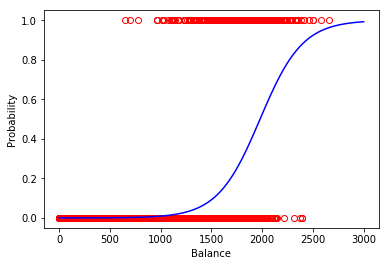

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X, y, 'or', mfc='none');
plt.plot(X_pred, y_pred[:,1], '-b');
plt.xlabel('Balance');
plt.ylabel('Probability')

In [12]:
# Let's see how precise the predictor is
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(X)
confusion_matrix(y, y_pred)

array([[9639,   28],
       [ 246,   87]])

# Lesson
Logistic regression tends to favour over-represented class
# Remedy
Cut the probability at the right point

In [13]:
y_pred = (lr.predict_proba(X)[:,1]>0.03)*1
confusion_matrix(y, y_pred)

array([[7988, 1679],
       [  26,  307]])

# Linear Discriminant
Linear discriminant analysis (lda) is one of the most popular classifiers.


In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Make sure you feed the data in the right shape  
X = default_data[['balance']]
y = default_data['default_factor']
lda = LinearDiscriminantAnalysis()
lda.fit(X,y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [15]:
X_pred = np.array([1500, 2000]).reshape(-1,1)
print(lda.predict_proba(X_pred))

[[ 0.9119783   0.0880217 ]
 [ 0.50986471  0.49013529]]


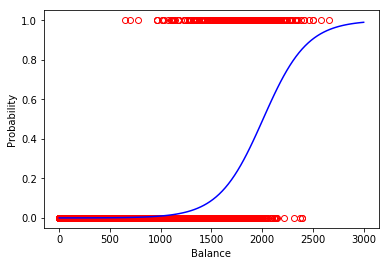

In [16]:
X_pred = np.linspace(start = 0, stop = 3000, num= 100).reshape(-1,1)
y_pred = lda.predict_proba(X_pred)
plt.plot(X, y, 'or', mfc='none');
plt.plot(X_pred, y_pred[:,1], '-b');
plt.xlabel('Balance');
plt.ylabel('Probability');

In [17]:
y_pred = lda.predict(X)
confusion_matrix(y, y_pred)

array([[9643,   24],
       [ 257,   76]])

# Lesson
Linear discriminant is a bit better in the case of unbalanced data. 

In [18]:
y_pred = (lda.predict_proba(X)[:,1]>0.03)*1
confusion_matrix(y, y_pred)

array([[7990, 1677],
       [  26,  307]])

# Quadratic Discriminant
Quadratic discriminant functions the same as the linear discriminant. Here we only repeat the codes above.


In [19]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# Make sure you feed the data in the right shape  
X = default_data[['balance']]
y = default_data['default_factor']
qda = QuadraticDiscriminantAnalysis()
qda.fit(X,y)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [20]:
X_pred = np.array([1500, 2000]).reshape(-1,1)
print(qda.predict_proba(X_pred))

[[ 0.89830669  0.10169331]
 [ 0.47945471  0.52054529]]


In [21]:
y_pred = qda.predict(X)
confusion_matrix(y, y_pred)

array([[9639,   28],
       [ 246,   87]])

In [22]:
y_pred = (qda.predict_proba(X)[:,1]>0.03)*1
confusion_matrix(y, y_pred)

array([[8139, 1528],
       [  29,  304]])

# Two predictors (or more)
Fitting the logistic regression with two predictors is very simplar to simple version. Just feed the appropriate matrix X.


In [23]:
X = default_data[['balance', 'income']]
y = default_data['default_factor']

lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

X_pred = np.array([1500, 20000, 1500, 25000]).reshape(2,2)
lr.predict_proba(X_pred)

# Logistic Regression with statsmodels
Always statsmodels provides more statistical details. Let's try fitting logistic regression with statsmodels

In [31]:
import statsmodels.formula.api as smf
lr = smf.Logit.from_formula(formula = "default_factor~balance+income", data= default_data).fit()


Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


In [36]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         default_factor   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Mon, 02 Apr 2018   Pseudo R-squ.:                  0.4594
Time:                        21:46:38   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0.000     24.835      0.000       0.005       0.006
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""